In [1]:
# importing necessary libraries 
import os 
from glob import glob 
import matplotlib.pyplot as plt 
import numpy as np

import json
import pandas as pd 

from tqdm.notebook import tqdm 

In [2]:
# Directory where the scans are stored with results 
root_dir = 'D:\sagar\Data'

### Box plot distribution of a single scan 

In [3]:
# Control-VILI
cntrl_vili_path = 'D:\sagar\Data\MD_1264_A10_Z6.6mm\porespy'
# Bleomycine-VILI
bleo_vili_path = 'D:\sagar\Data\MD_1264_A9_Z0.0mm_Z3.3mm\porespy'
# Bleomycine 
bleo_path = 'D:\sagar\Data\MD_1264_A6_1_Z3.3mm_corr_phrt\porespy'

In [4]:
import random

In [5]:
aFile = random.choice(glob(cntrl_vili_path + '/*_dth12.json'))
file = open(aFile)
data = json.load(file)
file.close()

In [6]:
blob_vol = data['volume']

In [7]:
def ratio_greater_than_threshold(lst, threshold, start=None, end=None):
    """
    Calculate the ratio of values in a list that are greater than a specified threshold.

    Args:
        lst (list): The list of numbers.
        threshold (float): The threshold value to compare each element against.
        start (float): The starting value of the range to consider. Defaults to None, which means
                       start at the beginning of the list.
        end (float): The ending value of the range to consider. Defaults to None, which means
                     end at the end of the list.

    Returns:
        float: The ratio of values in the specified range of the list that are greater than the threshold.
    """
    if start is None:
        start = lst[0]
    if end is None:
        end = lst[-1]

    start_index = lst.index(start) if start in lst else None
    end_index = lst.index(end) if end in lst else None

    if start_index is None:
        start_index = 0
    if end_index is None:
        end_index = len(lst)

    count_greater = sum(1 for x in lst[start_index:end_index] if x > threshold)
    count_total = end_index - start_index

    return count_greater / count_total if count_total > 0 else 0.0



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

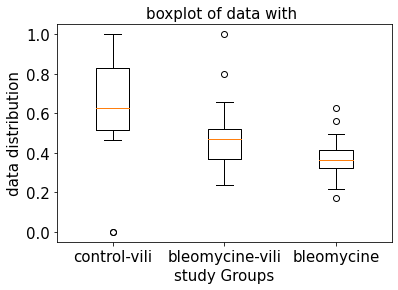

In [8]:
# Ploting box distribution 0f the blob volume ratio based on the threshold value. Choosing of threshold is user input 
blob_size_threshold = 100000
data_list = []

for path in list([cntrl_vili_path, bleo_vili_path, bleo_path]):
    feature = []
    for afile in tqdm(glob(path + '/*_dth12.json')):
        file = open(afile)
        data = json.load(file)
        file.close()
        volume = data['volume']
        if len(volume) > 0:
            feature.append(ratio_greater_than_threshold(volume, blob_size_threshold))
    data_list.append(feature)


# Create a figure and axis object
fig, ax = plt.subplots()
# Create the boxplot
ax.boxplot(data_list)
# Add labels and a title to the plot
ax.set_xlabel('study Groups', size=15)
ax.set_ylabel('data distribution', size=15)
ax.set_title(('boxplot of data with '), size=15)
ax.set_xticklabels(['control-vili', 'bleomycine-vili', 'bleomycine'])
ax.tick_params(axis='both', which='major', labelsize=15)

# Display the plot
plt.show()


In [9]:
# geting the group information
df = pd.read_csv('study_group.csv')
df

,Identification,Group,ImgBL,ImgVILI,Sample,Scan
0,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z0.0mm
1,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z3.3mm
2,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z6.6mm
3,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z9.9mm
4,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z13.2mm
...,...,...,...,...,...,...
72,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z0.0mm
73,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z3.3mm
74,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z6.6mm
75,Rat10,Con-VILI,1,1,MD_1264_B10,MD_1264_B10_Z0.0mm


### Box plot distribution for each group

In [10]:
# Getting the scans where pypore3d analysis has been run 
scans = []
for p in os.listdir(root_dir):
    file_path = os.path.join(root_dir, p, 'porespy')
    if os.path.exists(file_path):
        scans.append(p)

In [11]:
# creating diffrent groupsfrom the available scans
scan_groups = {}
for g in np.unique(df['Group']):
    scan_groups[g] = []

for scan in scans:
    scan_index = df.loc[df['Scan'] == str(scan)].index[0]
    group = df['Group'][scan_index]
    scan_groups[group].append(scan)

print(scan_groups)

{'Ble': ['MD_1264_A11_Z3.3mm_corr_phrt', 'MD_1264_A18', 'MD_1264_A3_1_Z0.0mm', 'MD_1264_A3_1_Z3.3mm', 'MD_1264_A3_1_Z6.6mm', 'MD_1264_A3_1_Z9.9mm', 'MD_1264_A6_1_Z3.3mm_corr_phrt', 'MD_1264_B3_1_Z3.3mm'], 'Ble-VILI': ['MD_1264_A12_Z3.3mm_corr_phrt', 'MD_1264_A2_1_Z3.3mm', 'MD_1264_A5_1_Z0.0mm_corr_phrt', 'MD_1264_A8_1_Z3.3mm_corr_phrt', 'MD_1264_A9_Z0.0mm_Z3.3mm', 'MD_1264_B2_1', 'MD_1264_B5_1_Z3.3mm', 'MD_1264_B9_Z3.3mm'], 'Con-VILI': ['MD_1264_A10_Z6.6mm', 'MD_1264_A13_1_Z3.3mm_corr_phrt', 'MD_1264_A16_Z3.3mm_corr_phrt', 'MD_1264_A1_1_Z3.3mm', 'MD_1264_A4_1_Z0.0mm_Z0.0mm_corr_phrt', 'MD_1264_A4_1_Z0.0mm_Z3.3mm_corr_phrt', 'MD_1264_A4_1_Z0.0mm_Z6.6mm_corr_phrt', 'MD_1264_B10_Z3.3mm', 'MD_1264_B4_1_Z3.3mm']}


In [12]:
cntrl_vili_scans = scan_groups['Con-VILI']
bleo_vili_scans = scan_groups['Ble-VILI']
bleo_scans = scan_groups['Ble']

In [13]:
import ipywidgets as widgets 
from ipywidgets import VBox, HBox

In [66]:


select_cntrl_vili_scan = widgets.SelectMultiple(
    options = cntrl_vili_scans,
    value = [cntrl_vili_scans[0]],
    description = 'Control-VILI',
    disabled = False,
    rows = 10
)

select_bleo_vili_scan = widgets.SelectMultiple(
    options = bleo_vili_scans,
    value = [bleo_vili_scans[0]],
    description = 'Bleomycine-VILI',
    disabled = False,
    rows = 10
)

select_bleo_scan = widgets.SelectMultiple(
    options = bleo_scans,
    value = [bleo_scans[0]],
    description = 'Bleomycine',
    disabled = False,
    rows = 10
)

# Text box for threshold value of blob volume to calculate ratio
input_threshold_value = widgets.BoundedFloatText(
    value=100000,
    min=0,
    max=216000000,
    step=1000,
    description='Big Pore threshold',
    disabled=False
)

# create a text field for the filename
text_field = widgets.Text(
    value='filename.png',
    placeholder='Type something',
    description='Filename:',
    disabled=False
)

saveFig_button = widgets.Button(
    description='SaveFig',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
)

ui = VBox([HBox( [ VBox([widgets.Label(value=input_threshold_value.description), input_threshold_value]) ]), 
           HBox([
                 VBox([widgets.Label(value=select_bleo_scan.description), select_bleo_scan]),
                 VBox([widgets.Label(value=select_bleo_vili_scan.description), select_bleo_vili_scan]),
                 VBox([widgets.Label(value=select_cntrl_vili_scan.description), select_cntrl_vili_scan]) 
                 ]),
            HBox([text_field, saveFig_button])
        ])




input_threshold_value.description = ''
select_cntrl_vili_scan.description = ''
select_bleo_vili_scan.description = ''
select_bleo_scan.description = ''


# interactive function to control the input selection for box plot distribution plot
def interactive_box_plot(scan_cntrl_vili, scan_bleo_vili, scan_bleo, thres_value, data_path=root_dir, scan_regx='dth12'):
    
    
    data_list = []
    for agrp in [scan_bleo, scan_bleo_vili, scan_cntrl_vili]:
        json_files = []
        for aScan in agrp:
            fpath = os.path.join(data_path, aScan, 'porespy')
            json_files += glob(fpath + '\*' +scan_regx + '.json')
        
        feature = []
        for afile in json_files:
            file = open(afile)
            data = json.load(file)
            file.close()
            volume = data['volume']
            if len(volume) > 0:
                feature.append(ratio_greater_than_threshold(volume, thres_value))
                       
        data_list.append(feature)

    
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(10,6))
    # Create the boxplot
    ax.boxplot(data_list)
    # Add labels and a title to the plot
    ax.set_xlabel('study Groups', size=15)
    ax.set_ylabel('data distribution', size=15)
    ax.set_title(('boxplot of data with '+ scan_regx), size=15)
    ax.set_xticklabels(['bleomycine', 'bleomycine-vili', 'control-vili'])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    # Display the plot
    plt.show()

    def on_button_clicked(b):
        fig.savefig(text_field.value)
    
    saveFig_button.on_click(on_button_clicked)

out = widgets.interactive_output(interactive_box_plot, {'scan_cntrl_vili':select_cntrl_vili_scan, 'scan_bleo_vili':select_bleo_vili_scan, 
                                                        'scan_bleo':select_bleo_scan, 'thres_value': input_threshold_value,
                                                        })

display(ui, out)

Output()

### cross correlation plots among all the features from porespy 

#### feature cross correlation heatmap in a group

In [53]:
# Cross-Correlation of features for all scans in each group 

ble_data_dict = {}
listOfFeatures = ['volume', 'sphericity', 'surface_area', 'convex_volume', 'equivalent_diameter_area', 'extent', 'solidity']


for af in listOfFeatures:
    data_value = []
    for aScan in bleo_scans:
        fpath = os.path.join(root_dir, aScan, 'porespy')
        json_files = glob(fpath + '\*' + 'dth12' + '.json')

        # list of featutes in all roi in a scan. example [ median(roi1_volume), median(roi2_volume), .........]
        parameter = [] 
        for json_file in json_files:
            file = open(json_file)
            data = json.load(file)
            file.close()

            extract_feature = data[af]

            if len(extract_feature) > 0:
                parameter.append(np.median(extract_feature))
        
        # value appended per scan
        data_value.append(np.mean(parameter))

    ble_data_dict[af] = data_value


data_value = []
for aScan in bleo_scans:
    fpath = os.path.join(root_dir, aScan, 'porespy')
    json_files = glob(fpath + '\*' + 'dth12' + '.json')

    # list of featutes in all roi in a scan. example [ median(roi1_volume), median(roi2_volume), .........]
    parameter = [] 
    for json_file in json_files:
        file = open(json_file)
        data = json.load(file)
        file.close()
        extract_feature = data['volume']

        if len(extract_feature) > 0:
            parameter.append(ratio_greater_than_threshold(extract_feature, 100000))
    
    # value appended per scan
    data_value.append(np.mean(parameter))

ble_data_dict['Big blob ratio'] = data_value




<AxesSubplot:>

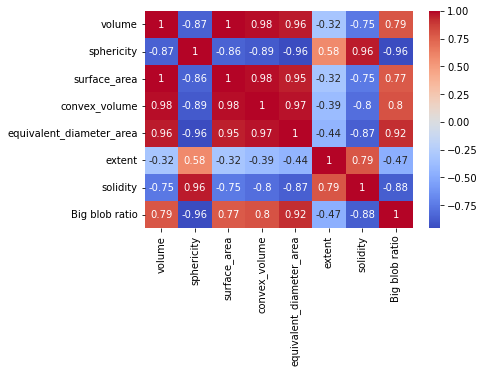

In [54]:
import pandas as pd
import seaborn as sns


# create a pandas dataframe from the dictionary
df = pd.DataFrame(ble_data_dict)

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

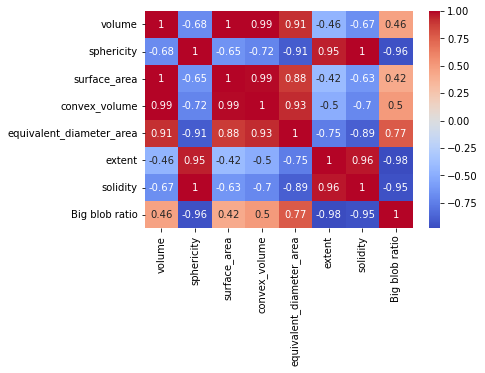

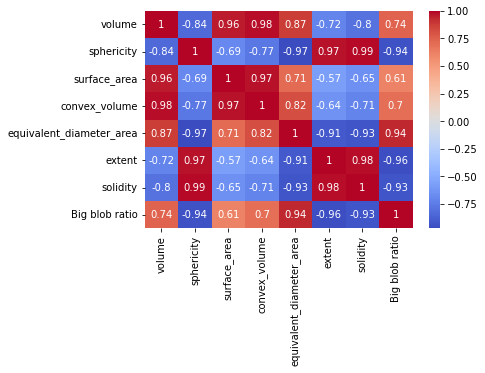

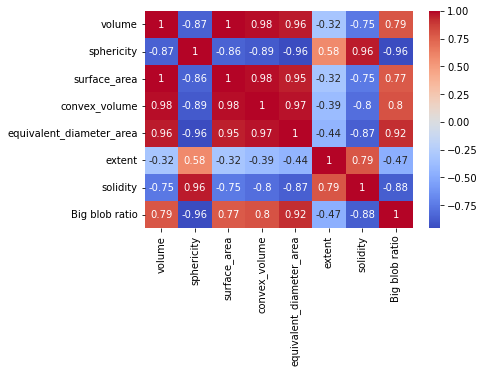

In [72]:
# Cross-Correlation of features for all scans in each group together 
listOfFeatures = ['volume', 'sphericity', 'surface_area', 'convex_volume', 'equivalent_diameter_area', 'extent', 'solidity']

for i, agrp in enumerate([cntrl_vili_scans, bleo_vili_scans, bleo_scans]):

    data_dict = {}
    for af in listOfFeatures:
        data_value = []
        for aScan in agrp:
            fpath = os.path.join(root_dir, aScan, 'porespy')
            json_files = glob(fpath + '\*' + 'dth12' + '.json')

            # list of featutes in all roi in a scan. example [ median(roi1_volume), median(roi2_volume), .........]
            parameter = [] 
            for json_file in json_files:
                file = open(json_file)
                data = json.load(file)
                file.close()

                extract_feature = data[af]

                if len(extract_feature) > 0:
                    parameter.append(np.median(extract_feature))
            
            # value appended per scan
            data_value.append(np.mean(parameter))

        data_dict[af] = data_value


    data_value = []
    for aScan in agrp:
        fpath = os.path.join(root_dir, aScan, 'porespy')
        json_files = glob(fpath + '\*' + 'dth12' + '.json')

        # list of featutes in all roi in a scan. example [ median(roi1_volume), median(roi2_volume), .........]
        parameter = [] 
        for json_file in json_files:
            file = open(json_file)
            data = json.load(file)
            file.close()
            extract_feature = data['volume']

            if len(extract_feature) > 0:
                parameter.append(ratio_greater_than_threshold(extract_feature, 100000))
        
        # value appended per scan
        data_value.append(np.mean(parameter))

    data_dict['Big blob ratio'] = data_value

    # create a pandas dataframe from the dictionary
    df = pd.DataFrame(data_dict)

    # calculate the correlation matrix
    corr_matrix = df.corr()

    # plot the heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    
    # plt.tight_layout()
    #plt.savefig('heatmap_'+str(i)+'.svg', bbox_inches="tight")
    plt.show()

#### all group together 

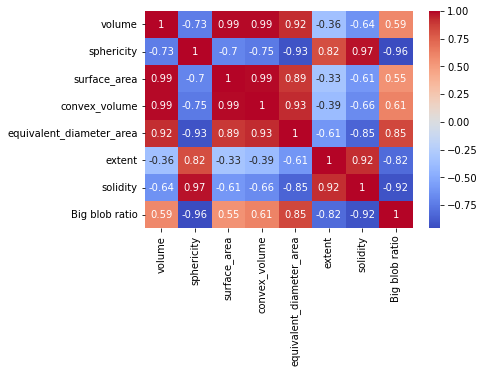

In [73]:
# Cross-Correlation of features for all scans irrespective of group 

listOfFeatures = ['volume', 'sphericity', 'surface_area', 'convex_volume', 'equivalent_diameter_area', 'extent', 'solidity']


data_dict = {}
for af in listOfFeatures:
    data_value = []
    for aScan in (cntrl_vili_scans + bleo_vili_scans + bleo_scans):
        fpath = os.path.join(root_dir, aScan, 'porespy')
        json_files = glob(fpath + '\*' + 'dth12' + '.json')

        # list of featutes in all roi in a scan. example [ median(roi1_volume), median(roi2_volume), .........]
        parameter = [] 
        for json_file in json_files:
            file = open(json_file)
            data = json.load(file)
            file.close()

            extract_feature = data[af]

            if len(extract_feature) > 0:
                parameter.append(np.median(extract_feature))
        
        # value appended per scan
        data_value.append(np.mean(parameter))

    data_dict[af] = data_value


data_value = []
for aScan in (cntrl_vili_scans + bleo_vili_scans + bleo_scans):
    fpath = os.path.join(root_dir, aScan, 'porespy')
    json_files = glob(fpath + '\*' + 'dth12' + '.json')

    # list of featutes in all roi in a scan. example [ median(roi1_volume), median(roi2_volume), .........]
    parameter = [] 
    for json_file in json_files:
        file = open(json_file)
        data = json.load(file)
        file.close()
        extract_feature = data['volume']

        if len(extract_feature) > 0:
            parameter.append(ratio_greater_than_threshold(extract_feature, 100000))
    
    # value appended per scan
    data_value.append(np.mean(parameter))

data_dict['Big blob ratio'] = data_value

# create a pandas dataframe from the dictionary
df = pd.DataFrame(data_dict)

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('heatmap_all.svg', bbox_inches="tight")
plt.show()